## JSON workbook

In this workbook we'll explore the JSON data format and the available helper methods in Python and Pandas that will help us deal with JSON strings and files.

To recap what JSON is you can always refer to the offical documentation that can be found at https://www.json.org/

A quick example JSON looks something like:

```
{
   "first-name": "Jason",
   "last-name": "Bourne",
   "age": 32,
   "cities": ["London", "Beirut", "Paris"],  
   "last-activity": "2018-10-115T13:15:33Z"
}
```


### First look at JSON documents

To get started, let's look at a more complex JSON file, which we obtained via the Yahoo Weather API ( https://developer.yahoo.com/weather/ )

Use the Python built-in `open()` function and `.read()` the `data/weather_forecast.json` file , saving the result into a variable called `weather_forecast_json`:

In [11]:
with open('data/weather_forecast.json') as file:
    weather_forecast_json = file.read()


`print()` the contents of `weather_forecast_json` and look at the structure:

In [12]:
print(weather_forecast_json)

{
 "query": {
  "count": 1,
  "created": "2018-10-19T12:39:05Z",
  "lang": "en-US",
  "results": {
   "channel": {
    "units": {
     "distance": "mi",
     "pressure": "in",
     "speed": "mph",
     "temperature": "F"
    },
    "title": "Yahoo! Weather - Nome, AK, US",
    "link": "http://us.rd.yahoo.com/dailynews/rss/weather/Country__Country/*https://weather.yahoo.com/country/state/city-2460286/",
    "description": "Yahoo! Weather for Nome, AK, US",
    "language": "en-us",
    "lastBuildDate": "Fri, 19 Oct 2018 04:39 AM AKDT",
    "ttl": "60",
    "location": {
     "city": "Nome",
     "country": "United States",
     "region": " AK"
    },
    "wind": {
     "chill": "32",
     "direction": "45",
     "speed": "15"
    },
    "atmosphere": {
     "humidity": "85",
     "pressure": "1004.0",
     "rising": "0",
     "visibility": "16.1"
    },
    "astronomy": {
     "sunrise": "10:5 am",
     "sunset": "7:26 pm"
    },
    "image": {
     "title": "Yahoo! Weather",
     "width

### Getting attributes out of a JSON document

Look at the documentation for the Python JSON module ( https://docs.python.org/3/library/json.html ).

`import`the `json` module, then access the temperature unit and assign it to `temperature_unit`:

In [23]:
import json

weather_dict = json.loads(weather_forecast_json)
temperature_unit = weather_dict['query']['results']['channel']['units']['temperature']

In [24]:
print(temperature_unit)

F


### Getting more complex outputs from a JSON document

Now let's do something more interesting! We would like to see all of the `text` values from each forecast as a list of strings.

Our expected output is
```
['Partly Cloudy', 'Mostly Sunny', 'Mostly Sunny', 'Partly Cloudy', 'Partly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Partly Cloudy']
```

In [76]:
# weather_dict['query']['results']['channel']['item'].keys()

forecasts = weather_dict['query']['results']['channel']['item']['forecast']

weather_desc = [f['text'] for f in forecasts]
weather_desc

['Partly Cloudy',
 'Mostly Sunny',
 'Mostly Sunny',
 'Partly Cloudy',
 'Partly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Partly Cloudy',
 'Partly Cloudy']

### Writing JSON documents

Let's assume we'd like to send a system a JSON response, which looks like this:
```
{
    'paymentid': '35dfc21c-35b7-4459-a65c-284fcb03d57a',
    'type': 'p2p',
    'amount': 45000.0,
    'currency': 'GBP',
    'sender': 'batman@waynecorp.com',
    'beneficiary': 'catwoman@gmail.com'
}
```
* create the JSON document _without_ using string manipulations, or writing the whole JSON document as one string
* print out the JSON document   

_Hint: you can use a simple Python `dict` and the `.dumps()` method from the `json` module_

In [276]:
response_dct = {'payment_id':'35dfc21c-35b7-4459-a65c-284fcb03d57a',
                 'type':'p2p',
                 'amount':45000.0,
                 'currency':'GBP',
                 'sender':'batman@waynecorp.com',
                 'beneficiary':'catwoman@gmail.com'}

response_json = json.dumps(response_dct)

path = 'data/test_json_file.json'
with open(path, 'w') as f:
    json.dump(response_json, f, indent=2)
    print(f'saved to path: "{path}"')
    
print(response_json)

saved to path: "data/test_json_file.json"
{"payment_id": "35dfc21c-35b7-4459-a65c-284fcb03d57a", "type": "p2p", "amount": 45000.0, "currency": "GBP", "sender": "batman@waynecorp.com", "beneficiary": "catwoman@gmail.com"}


## Working with JSON using `pandas`

Pandas simplifies working with JSON documents. We'll be looking at 2 common uses cases to demonstrate that.

### Exercise: Loading a pure JSON dataset

In `data/population2010.json` you'll find a dataset in pure JSON format.
* Open it up with your text-editor-of-choice (or Jupyter) and examine the format
* Use the pandas `.read_json()` method (see [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html)) to read the contents into a DataFrame called `population_2010_df`
* Print the `.shape` and `.head()` of the DataFrame

In [94]:
import pandas as pd

with open('data/population2010.json', 'r') as f:
    population_2010_df = pd.read_json(f)

print(population_2010_df.shape, population_2010_df.head())
          


(101, 6)    females        country  age    males  year    total
0  1966000  United States    0  2054000  2010  4019000
1  1973000  United States    1  2056000  2010  4030000
2  1979000  United States    2  2059000  2010  4038000
3  1983000  United States    3  2061000  2010  4043000
4  1985000  United States    4  2063000  2010  4048000


### Saving a pure JSON dataset

The data folder (as you have probably seen) contains multiple files with a similar name:
* `population1970.json`
* `population1980.json`
* `population1990.json`
* `population2000.json`
* `population2010.json`

We would like to unify these datasets with pandas. To do that, you'll need to 
* load all of these files into separate DataFrames
* combine them (find the right pandas method to do that!)


Then, use the pandas `.to_json()` method with the parameter `orient='records'` to save the combined DataFrame to a file.
* open the resulting text file using your text editor and examine the results

In [170]:
from glob import glob
import re
from pathlib import Path

files = glob('data/*.json')
file_names = [f for f in files if re.match(r'.+population', f)]

dataframes = []
for fn in file_names:
    with open(fn, 'r') as f:
        dataframes.append(pd.read_json(f))

combined_df = pd.concat(dataframes)

with open('combined_population_data.json', 'w') as f:
    f.write(combined_df.to_json(orient='records'))


### [Optional] Dealing with CSV/JSON mixed datasets

In `data/kickstarter_sample.csv` you'll find the first 100 rows of a dataset from Kickstarter.  

This particular dataset is a combination of CSV and JSON formats, where the dataset itself is CSV, but a few columns have JSON documents as values.

In [173]:
ks = pd.read_csv('data/kickstarter_sample.csv')
ks.head()

,id,photo,name,blurb,goal,slug,disable_communication,country,currency,currency_symbol,...,location,category,profile,urls,source_url,friends,is_starred,is_backing,permissions,state
0,663816109,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Angular - Where Modern Art meets Cards,Angular is a minimalist card design for simpli...,17380.0,angular-where-modern-art-meets-cards,False,US,USD,$,...,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,failed
1,1462931821,"{""small"":""https://ksr-ugc.imgix.net/assets/014...",Ladybeard is KAWAII-CORE,Original songs and music videos to jump start ...,24000.0,ladybeard-is-kawaii-core,False,US,USD,$,...,"{""country"":""JP"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,failed
2,1724358498,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Vegan Cafe Delivery Service in Vancouver BC,Our project is to launch a vegan lunch deliver...,40000.0,vegancafeca,False,CA,CAD,$,...,"{""country"":""CA"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,failed
3,314918941,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Photoetched Rail Yard Exposition,I have developed a process of my own which tra...,1000.0,photoetched-rail-yard-exposition,False,US,USD,$,...,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,successful
4,1766165140,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Cinnamon Fletcher needs to be brought to life!,Need to pay an illustrator to bring my childre...,700.0,cinnamon-fletcher-needs-to-be-brought-to-life,False,GB,GBP,Â£,...,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,failed


Remember that we can use `json_normalize` ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.json.json_normalize.html)) from pandas to flatten nested JSON structures.



Here are a couple of examples:

In [174]:
data = '{"city": "London", "people": [{"name": "Marcel"}, {"name": "John"}]}'
d = json.loads(data)
pd.json_normalize(d, "people",  meta=["city"])


,name,city
0,Marcel,London
1,John,London


*__If you get an error__, it may be because you have an earlier version of pandas installed.*

Either update pandas:
`!conda update pandas -y`

Or first execute:
`from pandas.io.json import json_normalize` 



In [175]:
sample_location = '{"country":"US","urls":{"web":{"discover":\
"https://www.kickstarter.com/discover/places/raleigh-nc","location":\
"https://www.kickstarter.com/locations/raleigh-nc"},"api":\
{"nearby_projects":"https://api.kickstarter.com/v1/discover?\
signature=1500237670.62036dae574e222e5bd17f9b995c9865f2834bc7&woe_id=2478307"}},\
"name":"Raleigh","displayable_name":"Raleigh, NC","short_name":"Raleigh, NC",\
"id":2478307,"state":"NC","type":"Town","is_root":false,"slug":"raleigh-nc"}'


pd.json_normalize(json.loads(sample_location))

,country,name,displayable_name,short_name,id,state,type,is_root,slug,urls.web.discover,urls.web.location,urls.api.nearby_projects
0,US,Raleigh,"Raleigh, NC","Raleigh, NC",2478307,NC,Town,False,raleigh-nc,https://www.kickstarter.com/discover/places/ra...,https://www.kickstarter.com/locations/raleigh-nc,https://api.kickstarter.com/v1/discover?signat...


Unfortunately this method does not work on a DataFrame, only on a Python dictionary or list of dictionaries.


Try using `json_normalize` to normalize the `photo` JSON column of the Kickstarter DataFrame, and extend the DataFrame by adding the new columns.

Hints:
* a Dataframe column of JSON strings can easily be converted to a list of dicts
* extra columns can always be added to a DataFrame if the number of rows match

In [227]:
photo_list =  [json.loads(r) for r in ks.photo.values]

unnested_df = ks.join(pd.json_normalize(photo_list, meta='photo'))

# print(unnested_df.photo.iloc[0])
# unnested_df['small'].iloc[0]


def test_unnest():
    case = json.loads(ks.photo.iloc[0])
    result = unnested_df.small.iloc[0]

    assert case['small'] == result
    print('test passed')

test_unnest()

test passed


In [260]:
from IPython.display import Image

# show image
image_url = unnested_df['small'].iloc[0]
print(image_url)

# using ipython url 
Image(url=image_url) 


https://ksr-ugc.imgix.net/assets/012/384/964/7a20ef8917d7de846e9b6bf66a3b2a66_original.png?crop=faces&w=160&h=90&fit=crop&v=1463758293&auto=format&q=92&s=53b64c027846b947a57e6ea6de25399d


200 None


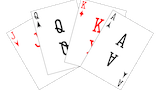

In [259]:
# using requests

import requests

r = requests.get(image_url)
print(r.status_code, r.encoding)
image = r.content

Image(image)

### [Optional] Validating JSON Documents

As a last activity we'll write a simple schema validation for the document we have started with:

```
{
   "first-name": "Jason",
   "last-name": "Bourne",
   "age": 32,
   "cities": ["London", "Beirut", "Paris"],  
   "last-activity": "2018-10-115T13:15:33Z"
}
```

Write a schema that successfully validates the above message, so the below snippet can run without an error.

Useful resources to consider:
* http://json-schema.org/
* https://pypi.org/project/jsonschema/ 

In [272]:
jason_bourne = json.loads('\
{\
   "first-name": "Jason",\
   "last-name": "Bourne",\
   "age": 32,\
   "cities": ["London", "Beirut", "Paris"],\
   "last-activity": "2018-10-115T13:15:33Z"\
}\
')

schema = ...
#TODO: put your schema here
schema = {
    "type" : "object",
    "properties" : {
        "first-name" : {"type" : "string"},
        "last-name" : {"type" : "string"},
        "age" : {"type" : "number"},
        "cities" : {"type" : "array", "items": {"type": "string"}},
        "last-activity" : {"type" : "string"}
     }
}



from jsonschema import validate
validate(jason_bourne, schema=schema, cls='Validator')

AttributeError: 'str' object has no attribute 'check_schema'